In [3]:
# https://gitlab.ethz.ch/socceranalytics/uefa-euro-2020/-/snippets/556
# 556

import pandas as pd
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl
import socceraction.vaep.features as fs
import socceraction.vaep.labels as lab
from socceraction.vaep import VAEP
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotsoccer as mps
import math
import numpy as np
import socceraction.xthreat as xthreat

In [4]:
url_grid = "https://karun.in/blog/data/open_xt_12x8_v1.json"
xT_model = xthreat.load_model(url_grid)

pd.set_option("display.max_rows", None)

SBL = StatsBombLoader(getter = "local", root = "../../data/statsbomb360")#TODO: Insert path to Statsbomb Event data

# = SBL.games(competition_id=, season_id=).set_index("game_id")#TODO: Insert Competition (55) and Season (43) ID

df_events = SBL.events(game_id = 3788747)#TODO: Insert Game ID
df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=915)#TODO: Insert Home-Team ID

df_actions_ltr = spadl.play_left_to_right(df_actions, 915)#TODO: Enter Home-Team ID after ,
df_players = SBL.players(game_id =3788747)#TODO: Enter Game ID
df_teams = SBL.teams(game_id = 3788747)#TODO: Enter Game ID

In [ ]:
goal_ids = ['7f1c8fcb-09f3-4e52-a9ef-61463f361b2a', 'ba780267-f8c8-4f25-8dd6-ff5d5431ce1f', '6c61441f-b5f9-47d7-957f-3278d85785ae', '12bfbb55-38e6-4a1b-bec2-5870a6883d9a']

#for ind in range(2,3):#range(len(df_actions)):
#    print(df_actions_goal.loc[ind])

action_ids = []
for ind in range(len(df_actions)):
    if df_actions.loc[ind].original_event_id in goal_ids:
        print(df_actions.loc[ind])
        action_ids.append(df_actions.loc[ind].action_id)

print(action_ids)


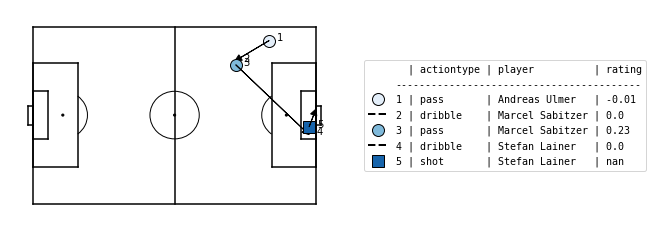

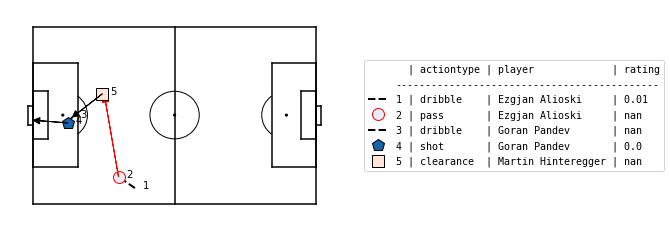

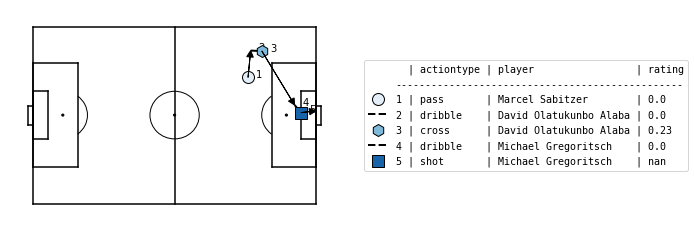

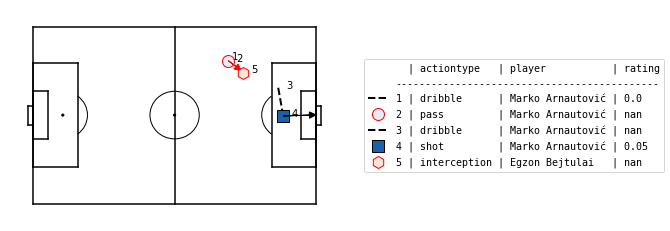

In [19]:
### goals:
# 00:17:32.738 - 
# 788


def plot_actions(start, end):
    df_actions_goal = df_actions.loc[start:end]
    df_actions_goal = spadl.add_names(df_actions_goal)
    df_actions_goal = df_actions_goal.merge(df_teams).merge(df_players)

    df_actions_goal["xT_value"] = np.around(xT_model.rate(df_actions_ltr)[start:end+1], 2)

    mps.actions(
        location=df_actions_goal[["start_x", "start_y", "end_x", "end_y"]],
        action_type=df_actions_goal.type_name,
        team=df_actions_goal.team_name,
        result=df_actions_goal.result_name == "success",
        label=df_actions_goal[["type_name", "player_name", "xT_value"]],
        labeltitle=["actiontype", "player", "rating"],
        zoom=False
    )

for i in range(len(action_ids)):
    plot_actions(action_ids[i]-4, action_ids[i])